# Why Do Employees Quit their Jobs at Institutes of Queensland, Australia?

In this project we will clean and analyze exit surveys from employees of two institutes in Queensland, Australia:
- The Technical and Further Education institute - TAFE.
- The Department of Education, Training and Employment - DETE.

The surveys can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The aim of this project is to understand why employees are resigning from these institutes in order to predict churn later on.

We will try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 150 # Avoid truncated output

### Load the datasets

It appears that the string `Not Stated` is used in place of `NaN` in columns like `DETE Start Date`, `Role Start Date`.

We will read in the data again with the correct parameter to handle these `NaN` values:

In [2]:
dete_survey = pd.read_csv(
    'dete-exit-survey-january-2014.csv'
    , encoding='cp1252'
    , na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv', encoding='cp1252')
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

The datasets contain columns related to our analysis although the column names are different and the content might need transformations.

Therefore if we want to perform analysis on a merged dataset we will need to perform some cleaning first.

## Data Cleaning

First we will rename columns in TAFE survey to match the one in DETE.

In [4]:
# Format column names in dete_survey
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')

dete_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,professional_development,opportunities_for_promotion,staff_morale,workplace_issue,physical_environment,worklife_balance,stress_and_pressure_support,performance_of_supervisor,peer_support,initiative,skills,coach,career_aspirations,feedback,further_pd,communication,my_say,information,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.columns = tafe_survey.columns.str.lower().str.split().map(lambda col: '_'.join(col))

# Update column names in tafe_survey to match the names in dete_survey
mapping = {'cessation_year': 'cease_date', 
           'reason_for_ceasing_employment': 'separationtype', 
           'gender._what_is_your_gender?': 'gender', 
           'currentage._current_age': 'age',
           'employment_type._employment_type': 'employment_status',
           'classification._classification': 'position'}

tafe_survey = tafe_survey.rename(mapping, axis=1)

tafe_survey.head()

,record_id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,main_factor._which_of_these_was_the_main_factor_for_leaving?,instituteviews._topic:1._i_feel_the_senior_leadership_had_a_clear_vision_and_direction,instituteviews._topic:2._i_was_given_access_to_skills_training_to_help_me_do_my_job_better,instituteviews._topic:3._i_was_given_adequate_opportunities_for_personal_development,instituteviews._topic:4._i_was_given_adequate_opportunities_for_promotion_within_%institute]q25lbl%,instituteviews._topic:5._i_felt_the_salary_for_the_job_was_right_for_the_responsibilities_i_had,instituteviews._topic:6._the_organisation_recognised_when_staff_did_good_work,instituteviews._topic:7._management_was_generally_supportive_of_me,instituteviews._topic:8._management_was_generally_supportive_of_my_team,instituteviews._topic:9._i_was_kept_informed_of_the_changes_in_the_organisation_which_would_affect_me,instituteviews._topic:10._staff_morale_was_positive_within_the_institute,instituteviews._topic:11._if_i_had_a_workplace_issue_it_was_dealt_with_quickly,instituteviews._topic:12._if_i_had_a_workplace_issue_it_was_dealt_with_efficiently,instituteviews._topic:13._if_i_had_a_workplace_issue_it_was_dealt_with_discreetly,workunitviews._topic:14._i_was_satisfied_with_the_quality_of_the_management_and_supervision_within_my_work_unit,workunitviews._topic:15._i_worked_well_with_my_colleagues,workunitviews._topic:16._my_job_was_challenging_and_interesting,workunitviews._topic:17._i_was_encouraged_to_use_my_initiative_in_the_course_of_my_work,workunitviews._topic:18._i_had_sufficient_contact_with_other_people_in_my_job,workunitviews._topic:19._i_was_given_adequate_support_and_co-operation_by_my_peers_to_enable_me_to_do_my_job,workunitviews._topic:20._i_was_able_to_use_the_full_range_of_my_skills_in_my_job,workunitviews._topic:21._i_was_able_to_use_the_full_range_of_my_abilities_in_my_job._;_category:level_of_agreement;_question:your_views_about_your_work_unit],workunitviews._topic:22._i_was_able_to_use_the_full_range_of_my_knowledge_in_my_job,workunitviews._topic:23._my_job_provided_sufficient_variety,workunitviews._topic:24._i_was_able_to_cope_with_the_level_of_stress_and_pressure_in_my_job,workunitviews._topic:25._my_job_allowed_me_to_balance_the_demands_of_work_and_family_to_my_satisfaction,workunitviews._topic:26._my_supervisor_gave_me_adequate_personal_recognition_and_feedback_on_my_performance,"workunitviews._topic:27._my_working_environment_was_satisfactory_e.g._sufficient_space,_good_lighting,_suitable_seating_and_working_area",workunitviews._topic:28._i_was_given_the_opportunity_to_mentor_and_coach_others_in_order_for_me_to_pass_on_my_skills_and_knowledge_prior_to_my_cessation_date,workunitviews._topic:29._there_was_adequate_communication_between_staff_in_my_unit,workunitviews._topic:30._staff_morale_was_positive_within_my_work_unit,induction._did_you_undertake_workplace_induction?,inductioninfo._topic:did_you_undertake_a_corporate_induction?,inductioninfo._topic:did_you_undertake_a_institute_induction?,inductioninfo._topic:_did_you_undertake_team_induction?,inductioninfo._face_to_face_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo._on-line_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo._induction_manual_topic:did_you_undertake_a_corporate_induction?,inductioninfo._face_to_face_topic:did_you_undertake_a_institute_induction?,inductioninfo._on-line_topic:did_you_undertake_a_institute_induction?,inductioninfo._ind

We are only interested on employees having resigned from their jobs. We will filter the data accordingly first:

In [6]:
dete_survey['separationtype'].value_counts() 

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We don't need resignation reasons, so we will just replace resignation reasons to `Resignation`.

In [7]:
dete_survey['separationtype'] = dete_survey['separationtype'].str.split('-').str[0]
dete_survey['separationtype'].value_counts() 

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [8]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [9]:
# Filter data
dete_survey = dete_survey[dete_survey['separationtype'] == 'Resignation']
tafe_survey = tafe_survey[tafe_survey['separationtype'] == 'Resignation']

print("Number of rows in dete_survey: ", dete_survey.shape[0])
print("Number of rows in tafe_survey: ", tafe_survey.shape[0])

Number of rows in dete_survey:  311
Number of rows in tafe_survey:  340


### Find Years of Service in the Institute

As we aim at finding why the employees resign from the institute, it will come in handy to know the number of years they stayed in the institute.

This value already exists in TAFE dataset but not yet in DETE so we need to compute it and store it in a new column.

In [10]:
# Change column names for ease of use/merge
tafe_survey = tafe_survey.rename({
    'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'institute_service_length'}, axis=1)

In [11]:
tafe_survey['institute_service_length'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service_length, dtype: int64

We transform these string values as integer:

In [12]:
tafe_survey['institute_service_length'] = tafe_survey['institute_service_length'] \
    .str.extract(r'(\d+)') \
    .astype(float)

tafe_survey['institute_service_length'].value_counts()

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service_length, dtype: int64

In [13]:
# We prepare data to compute `institute_service_length` and `role_service_length` for DETE
dete_survey['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

Looking at the different values for `cease_date`, we need to remove the months in some for the dates:

In [14]:
# Only keep the year in cease_date
dete_survey['cease_date'] = dete_survey['cease_date'].str.split('/').str[-1] # Select the last element after split on '/'
dete_survey['cease_date'] = dete_survey['cease_date'].astype(float) # Convert as float because of NaN values
dete_survey['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [15]:
# Compute years of service in the institute
dete_survey['institute_service_length'] = dete_survey['cease_date'] - dete_survey['dete_start_date']
dete_survey['institute_service_length'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service_length, dtype: float64

### Identify Dissatisfied Employees

One of the main reasons for quitting a job is because of dissatisfaction. 

We are going to label each row to identify employees who resigned because they were dissatisfied. Here are the columns we are going to use to categorize the employees:

1. `dete_survey`:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - lack_of_recognition
    - lack_of_job_security
    - employment_conditions
    - work_life_balance
    - workload
2. `tafe_survey`:
    - contributing_factors._dissatisfaction
    - contributing_factors._job_dissatisfaction

If the employee indicated any of the factors above caused him to resign, we will label him as dissatisfied.

In [16]:
# If any of the columns is True, we consider the employee as dissatisfied
dete_survey['dissatisfied'] = dete_survey[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                           'lack_of_recognition', 'lack_of_job_security', 'employment_conditions',
                                           'work_life_balance', 'workload']].any(axis=1)

dete_survey['dissatisfied'].value_counts(dropna=False)

False    171
True     140
Name: dissatisfied, dtype: int64

In [17]:
tafe_survey['contributing_factors._dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors._dissatisfaction, dtype: int64

In [18]:
tafe_survey['contributing_factors._job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors._job_dissatisfaction, dtype: int64

It appears the values for the columns `contributing_factors._dissatisfaction` and `contributing_factors._job_dissatisfaction` in TAFE dataset are not booleans. We need to apply a transformation on these values before finding out the dissatisfaction label.

In [19]:
# Update the values in the contributing factors columns to boolean values
def transform_value(value):
    # We infer with NaN values that the employee is not dissatisfied
    if value == '-' or pd.isnull(value):
        return False
    return True

tafe_survey['dissatisfied'] = tafe_survey[[
    'contributing_factors._dissatisfaction', 'contributing_factors._job_dissatisfaction']] \
    .applymap(transform_value).any(axis=1)

tafe_survey['dissatisfied'].value_counts(dropna=True)

False    249
True      91
Name: dissatisfied, dtype: int64

### Combining the Datasets

In order to perform our analysis we will combine the dataframes first. To differentiate between the surveys we will add an extra column: `institute`.

In [20]:
tafe_survey['institute'] = 'TAFE'
dete_survey['institute'] = 'DETE'

In [21]:
# Combine the dataframes
surveys = pd.concat([tafe_survey, dete_survey])
surveys.head()

,record_id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,main_factor._which_of_these_was_the_main_factor_for_leaving?,instituteviews._topic:1._i_feel_the_senior_leadership_had_a_clear_vision_and_direction,instituteviews._topic:2._i_was_given_access_to_skills_training_to_help_me_do_my_job_better,instituteviews._topic:3._i_was_given_adequate_opportunities_for_personal_development,instituteviews._topic:4._i_was_given_adequate_opportunities_for_promotion_within_%institute]q25lbl%,instituteviews._topic:5._i_felt_the_salary_for_the_job_was_right_for_the_responsibilities_i_had,instituteviews._topic:6._the_organisation_recognised_when_staff_did_good_work,instituteviews._topic:7._management_was_generally_supportive_of_me,instituteviews._topic:8._management_was_generally_supportive_of_my_team,instituteviews._topic:9._i_was_kept_informed_of_the_changes_in_the_organisation_which_would_affect_me,instituteviews._topic:10._staff_morale_was_positive_within_the_institute,instituteviews._topic:11._if_i_had_a_workplace_issue_it_was_dealt_with_quickly,instituteviews._topic:12._if_i_had_a_workplace_issue_it_was_dealt_with_efficiently,instituteviews._topic:13._if_i_had_a_workplace_issue_it_was_dealt_with_discreetly,workunitviews._topic:14._i_was_satisfied_with_the_quality_of_the_management_and_supervision_within_my_work_unit,workunitviews._topic:15._i_worked_well_with_my_colleagues,workunitviews._topic:16._my_job_was_challenging_and_interesting,workunitviews._topic:17._i_was_encouraged_to_use_my_initiative_in_the_course_of_my_work,workunitviews._topic:18._i_had_sufficient_contact_with_other_people_in_my_job,workunitviews._topic:19._i_was_given_adequate_support_and_co-operation_by_my_peers_to_enable_me_to_do_my_job,workunitviews._topic:20._i_was_able_to_use_the_full_range_of_my_skills_in_my_job,workunitviews._topic:21._i_was_able_to_use_the_full_range_of_my_abilities_in_my_job._;_category:level_of_agreement;_question:your_views_about_your_work_unit],workunitviews._topic:22._i_was_able_to_use_the_full_range_of_my_knowledge_in_my_job,workunitviews._topic:23._my_job_provided_sufficient_variety,workunitviews._topic:24._i_was_able_to_cope_with_the_level_of_stress_and_pressure_in_my_job,workunitviews._topic:25._my_job_allowed_me_to_balance_the_demands_of_work_and_family_to_my_satisfaction,workunitviews._topic:26._my_supervisor_gave_me_adequate_personal_recognition_and_feedback_on_my_performance,"workunitviews._topic:27._my_working_environment_was_satisfactory_e.g._sufficient_space,_good_lighting,_suitable_seating_and_working_area",workunitviews._topic:28._i_was_given_the_opportunity_to_mentor_and_coach_others_in_order_for_me_to_pass_on_my_skills_and_knowledge_prior_to_my_cessation_date,workunitviews._topic:29._there_was_adequate_communication_between_staff_in_my_unit,workunitviews._topic:30._staff_morale_was_positive_within_my_work_unit,induction._did_you_undertake_workplace_induction?,inductioninfo._topic:did_you_undertake_a_corporate_induction?,inductioninfo._topic:did_you_undertake_a_institute_induction?,inductioninfo._topic:_did_you_undertake_team_induction?,inductioninfo._face_to_face_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo._on-line_topic:did_you_undertake_a_corporate_induction;_category:how_it_was_conducted?,inductioninfo._induction_manual_topic:did_you_undertake_a_corporate_induction?,inductioninfo._face_to_face_topic:did_you_undertake_a_institute_induction?,inductioninfo._on-line_topic:did_you_undertake_a_institute_induction?,inductioninfo._ind

### Categorize Employee Age

To simplify the analysis we would like to label employees based on their ages.

Based on our intuition we will use the following labels:
- `Veteran` for employees aged 50 and more.
- `Established` between 40 and 50.
- `Experienced` between 30 and 40.
- `New` below 30.

In [22]:
# Extract Age
surveys['age'] = surveys['age'].str.extract(r'(\d+)').astype(float)

In [23]:
# Define the label according to the employee's age
def label_age(age):
    if age >= 55:
        return '55 and more'
    elif age >= 40:
        return '40 - 54'
    elif age >= 25:
        return '25 - 39'
    elif age < 0 or pd.isnull(age):
        return np.nan
    return '24 and less'

surveys['age_cat'] = surveys['age'].apply(label_age)

surveys['age_cat'].value_counts(dropna=False)

40 - 54        245
25 - 39        201
55 and more     78
24 and less     72
NaN             55
Name: age_cat, dtype: int64

In [24]:
surveys['age'].value_counts(
)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

### Categorize Service Length

To simplify the analysis we will add a column to categorize the number of years in the institute.

Based on our intuition we will use the following labels:
- `Veteran` for employees with more than 10 years in the institute.
- `Established` between 7 and 10.
- `Experienced` between 3 and 7.
- `New` between 0 and 3.

In [25]:
# Define the label according to the number of years in service
def label_service_length(service_length):
    if service_length > 10:
        return 'Veteran'
    elif service_length >= 7:
        return 'Established'
    elif service_length >= 3:
        return 'Experienced'
    elif service_length < 0 or pd.isnull(service_length):
        return np.nan
    return 'New'

surveys['service_length_cat'] = surveys['institute_service_length'].apply(label_service_length)

surveys['service_length_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_length_cat, dtype: int64

## Data Analysis


### How Satisfied Were the Former Employees?

In [26]:
# Check the proportion of dissatisfied employes
surveys['dissatisfied'].value_counts(dropna=False)

False    420
True     231
Name: dissatisfied, dtype: int64

Text(0, 0.5, 'Number Employees')

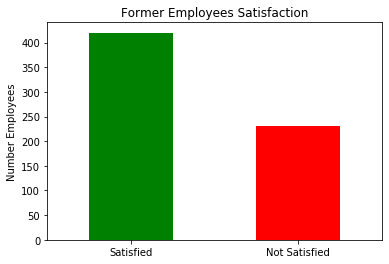

In [27]:
surveys['dissatisfied'].value_counts().plot(kind='bar', color=['green', 'red'], title='Former Employees Satisfaction')

plt.xticks(ticks=[0, 1], labels=['Satisfied', 'Not Satisfied'], rotation=0)
plt.ylabel('Number Employees')

We observe that the employees were in majority satisfied with their job.

However a lot of them were not (231 vs 420). This proportion does not look alarming but we should investigate on the usual proportion before taking on actions to improve employees satisfaction at work.

### Is There a Correlation Between Employee Satisfaction and the Years of Service?

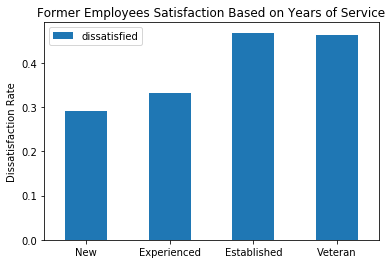

In [28]:
# For presentation purposes we display these labels in order
service_cat_ordered = ['New', 'Experienced', 'Established', 'Veteran']

surveys.pivot_table(index='service_length_cat', values='dissatisfied') \
    .loc[service_cat_ordered] \
    .plot(kind='bar', rot=0, title='Former Employees Satisfaction Based on Years of Service')

plt.xlabel('')
plt.ylabel('Dissatisfaction Rate')
plt.show()

We observe that the proportion of dissatisfied VS. satisfied employees increases greatly (from 0.3 to 4.8) with the number of years of service.

We also see that the increase of dissatisfied employees compared to the satisfied is plateauing as it stays stable for `Established` and `Veteran` employees.

An investigation should be conducted to understand why employees dissatisfaction is so high among employees with more service years.

### Is There a Difference Between Employee Satisfaction in the Institutes?

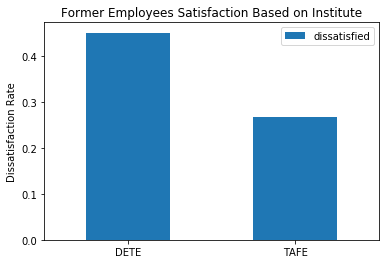

In [29]:
surveys.pivot_table(index='institute', values='dissatisfied') \
    .plot(kind='bar', rot=0, title='Former Employees Satisfaction Based on Institute')

plt.xlabel('')
plt.ylabel('Dissatisfaction Rate')
plt.show()

This graph shows us that dissatisfaction rate is way higher in the Department of Education, Training and Employment than in the Technical and Further Education institute.

We should focus on improving the satisfaction of current employees in DETE as it looks like the satisfaction level is abnormal (at least compared to TAFE):

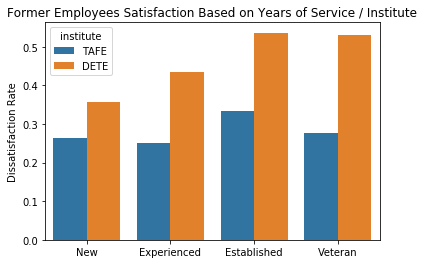

In [30]:
sns.barplot(data=surveys, x='service_length_cat', hue='institute', y='dissatisfied', order=service_cat_ordered, ci=None)

plt.title('Former Employees Satisfaction Based on Years of Service / Institute')
plt.xlabel('')
plt.ylabel('Dissatisfaction Rate')
plt.show()

Here we observe that the dissatisfaction rate is almost stable in TAFE whereas it increases in DETE as shown in the previous chart. Therefore we can identity a tendency for DETE employees to be less satisfied with their position in the institute the more they stay.

### Is There a Correlation Between Employee Satisfaction and Age?

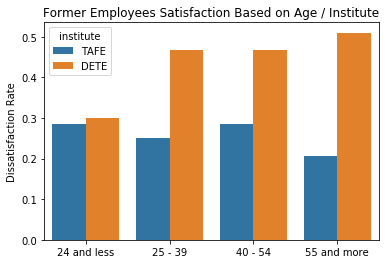

In [31]:
# For presentation purposes we display these labels in order
age_cat_ordered = ['24 and less', '25 - 39', '40 - 54', '55 and more']

sns.barplot(data=surveys, x='age_cat', hue='institute', y='dissatisfied', order=age_cat_ordered, ci=None)

plt.title('Former Employees Satisfaction Based on Age / Institute')
plt.xlabel('')
plt.ylabel('Dissatisfaction Rate')
plt.show()

Two opposite tendencies are shown in this graph:
- Employees satisfaction rate increases with age for TAFE.
- Employees satisfaction rate decreases with age for DETE.

## Conclusion

With this initial analysis we can conclude that employees dissatisfaction patterns are not similar between DETE and TAFE institute.
It appears that **dissatisfaction is higher for employees in DETE** although it could be explained by data collection and not reflect reality. 

Because of this dichotomy we need to break down our findings for the two institutes:
1. **Technical and Further Education Institute (TAFE):**
    - The number of years of service before resignment does not look correlated with dissatisfaction.
    - Employees satisfaction rate increases with age but this variation is quite small and might not be significant.
2. **Department of Education, Training and Employment (DETE):**
    - Dissatisfaction increases as the employee stays longer in the institute. Therefore more experienced employees are more likely to resign because of dissatisfaction.
    - Employees dissatisfaction rate increases with age quite significatively.

Our observations on the resigning employees of the **Department of Education, Training and Employment** are quite alarming and we should conduct a more in depth analysis on this institute to understand why older employees are unhappy with their jobs in the institute.

### Next Steps

Our next investigation should try to answer the following questions to find out dissatisfaction factors:
- Are employees getting bored of working in the institute? 
- Is there a lack of internal mobility or possibility to climb the hierarchy? 
- Do older employees feel abandoned by the management team?

Furthermore we should conduct a study on current employee satisfaction to anticipate churn and act it.